<a href="https://colab.research.google.com/github/moazkh60/Ice_Cream-Production_Time-Series/blob/master/Ice_Cream_Production_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ice Cream Production - Time Series

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [2]:
#read data
df_ice_cream = pd.read_csv('/content/drive/MyDrive/Datasets/ice_cream.csv')

In [3]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,60.1527
1,1972-02-01,67.2736
2,1972-03-01,74.4710
3,1972-04-01,78.3605
4,1972-05-01,85.0332


In [4]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [5]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

#set date as index
df_ice_cream.set_index('date', inplace=True)

In [6]:
start_date = pd.to_datetime('2005-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [7]:
df_ice_cream.head()

,production
date,
2005-01-01,130.6865
2005-02-01,148.6734
2005-03-01,159.7905
2005-04-01,172.3917
2005-05-01,170.5098


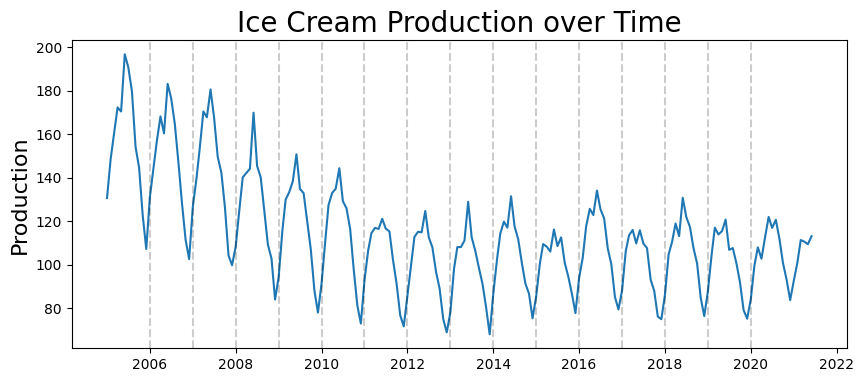

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2006,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

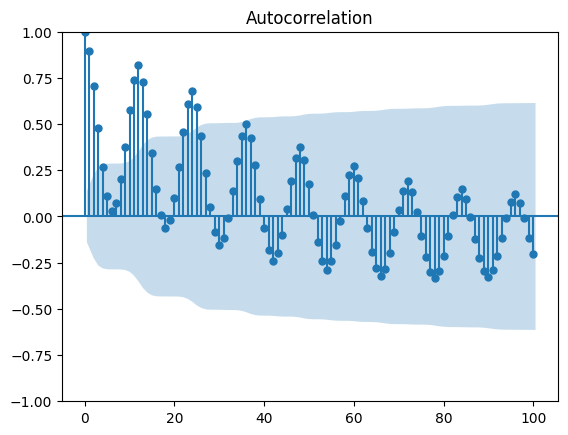

In [9]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

Likely an autoregressive model due to decaying ACF

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


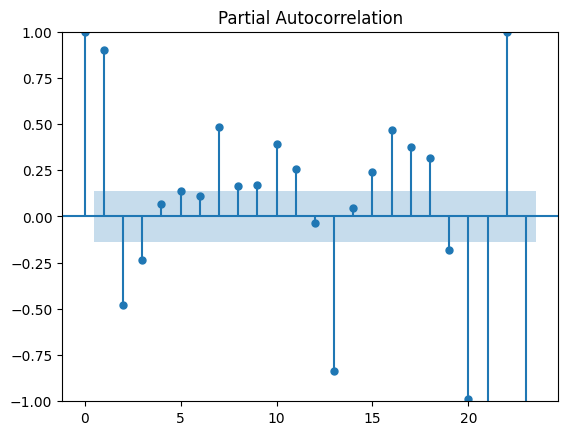

In [10]:
pacf_plot = plot_pacf(df_ice_cream.production)

Based on PACF we should start with an auto regressive model with lags at 1,2,3,7,10,11,13,14-23